In [1108]:
#####################################################################################################
######################### DATA EVALUATION SET  ######################################################
#####################################################################################################

In [1109]:
##########################################################################
############### Part I - Importing 
##########################################################################

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [1110]:
df_user = pd.read_csv('USER_TAKEHOME.csv')

In [1111]:
df_user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [1112]:
df_transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv')

df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [1113]:
df_product = pd.read_csv('PRODUCTS_TAKEHOME.csv')

df_product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [1114]:
#####################################################################
########################### Part II - Duplicates
#####################################################################

In [1115]:
df_user[df_user.duplicated()]                  #### data seems to be good so far


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER


In [1116]:
df_product[df_product.duplicated()]                  #### this data does have duplicate values

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
76394,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0
87568,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811.0
91710,Health & Wellness,Skin Care,NaN,NaN,"BEIERSDORF, INC.",COPPERTONE,NaN
100470,Snacks,Candy,Confection Candy,NaN,"LIDL US, LLC",LIDL,20744731.0
109639,Restaurant,Beverages,Soda,Diet Soda,PEPSICO,PEPSI,NaN
...,...,...,...,...,...,...,...
827242,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3423905.0
833620,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,NaN
834874,Snacks,Nuts & Seeds,Peanuts,NaN,NaN,NaN,3415207.0
838643,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3473108.0


In [1117]:
df_product.info()               #### Data type seems to be fine here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [1118]:
df_product.drop_duplicates(inplace=True)

In [1119]:
df_product[df_product.duplicated()]                  #### took care of the duplicates value

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE


In [1120]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         618875 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB


In [1121]:
df_transaction[df_transaction.duplicated()]                  #### this data does have duplicate values

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2724,1c12bd8a-c68c-41ee-a26d-294021d3e0b8,2024-09-07,2024-09-07 15:44:35.241 Z,CVS,65af09757050d0a6206ab136,NaN,1.00,
4192,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,1.00,
6572,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409 Z,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,1.200050e+10,1.00,
6623,43955b35-6fbc-4909-a4de-1a0de0dc387f,2024-09-06,2024-09-08 18:32:30.031 Z,WALMART,625364ddda4fb11c8a9fcb85,3.716877e+11,zero,12.97
7675,4ec870d2-c39f-4a40-bf8a-26a079409b20,2024-09-08,2024-09-08 19:39:01.589 Z,WALMART,638e9ae602a4e512e0585b59,7.239202e+10,zero,1.48
...,...,...,...,...,...,...,...,...
49651,93f45c94-af38-42d4-a3fe-eb9d5b24efbb,2024-09-03,2024-09-08 12:20:50.611 Z,PUBLIX,660a0ce6828f877fdee915a1,NaN,1.00,4.40
49660,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073 Z,PUBLIX,60cff0e7e265b446d62200b2,4.178027e+10,1.00,4.79
49759,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,1.00,0.52
49911,874a8116-3342-4b4a-9d24-4666e0ab1052,2024-08-31,2024-08-31 22:41:03.829 Z,CVS,63a4ef6bb5f32149b9d86e66,NaN,1.00,3.00


In [1122]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [1123]:
df_transaction.drop_duplicates(inplace=True)

df_transaction[df_transaction.duplicated()]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE


In [1124]:
df_transaction.info()                   #### Took care of the duplicates

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      49829 non-null  object 
 1   PURCHASE_DATE   49829 non-null  object 
 2   SCAN_DATE       49829 non-null  object 
 3   STORE_NAME      49829 non-null  object 
 4   USER_ID         49829 non-null  object 
 5   BARCODE         44094 non-null  float64
 6   FINAL_QUANTITY  49829 non-null  object 
 7   FINAL_SALE      49829 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [1125]:
####################################################################
############## Part III - Missing Values
####################################################################

Text(0.5, 1.0, 'Missing Data Heatmap')

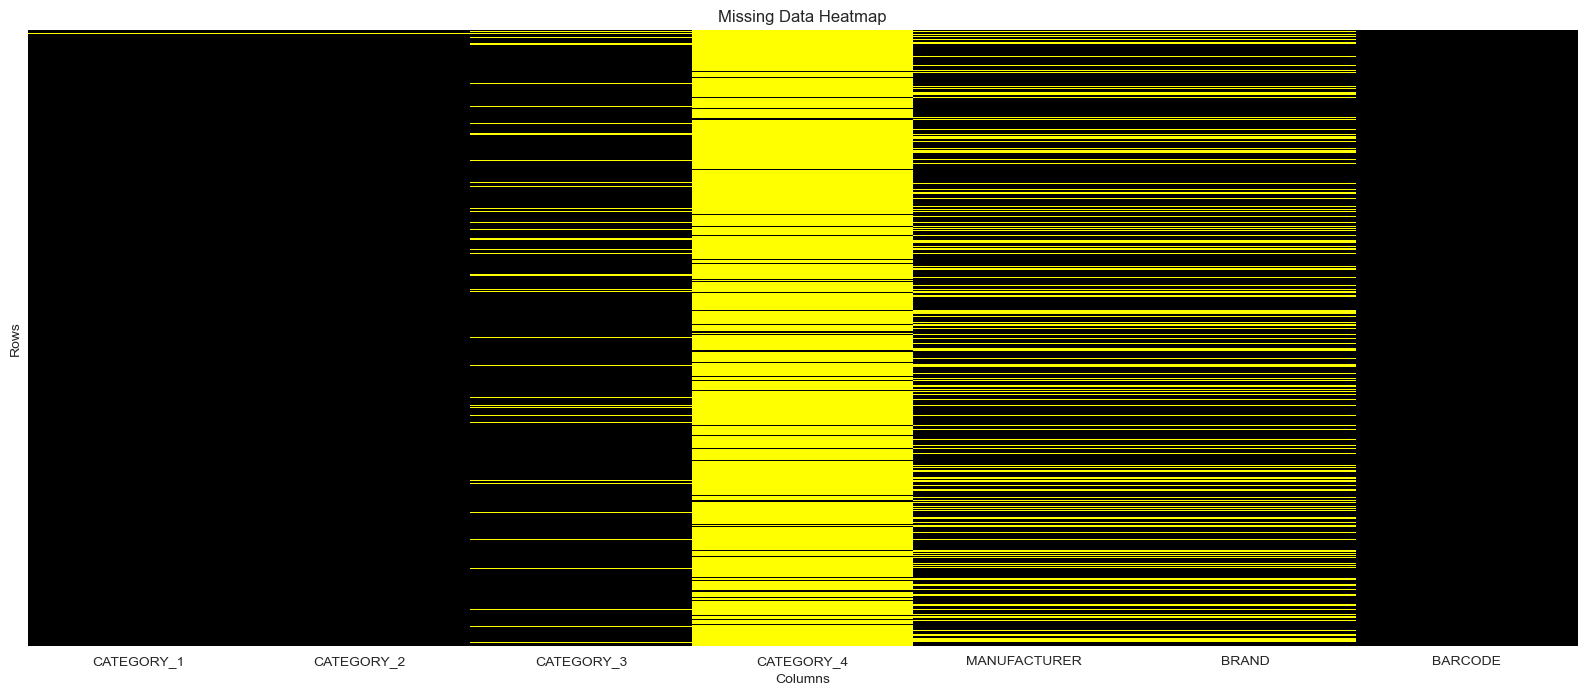

In [1126]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df_product.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

In [1127]:
df_product.head()                     #### We have unprecedented amount of null values in Category_4

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [1128]:
df_product.CATEGORY_4.value_counts(dropna=False)               #### Seems like we have 777884 null or missing values

CATEGORY_4
NaN                       777884
Lip Balms                   9737
Already Popped Popcorn      6974
Sleep Aids                  4978
Hair Brushes & Combs        4724
                           ...  
Sherbet                        1
Coconut Milk                   1
Corn Syrup                     1
White Merlot                   1
Spices                         1
Name: count, Length: 128, dtype: int64

#### How to take care of the missing values here?

#### We cannot do the mean of the data as it is not a number so it wouldn't work, we can use Mode imputation as its ordinal but seems like Category 4 has some correlation to other categories so it will throw off the analysis in the long run.
#### Best approach will be to fill it up with Unknown as it will not disturb our analysis


In [1130]:
df_product['CATEGORY_4'] = df_product.CATEGORY_4.fillna('Unknown')

In [1131]:
df_product.CATEGORY_4.value_counts(dropna=False)               #### Null values got replaced with Unknowns

CATEGORY_4
Unknown                   777884
Lip Balms                   9737
Already Popped Popcorn      6974
Sleep Aids                  4978
Hair Brushes & Combs        4724
                           ...  
Sherbet                        1
Coconut Milk                   1
Corn Syrup                     1
White Merlot                   1
Spices                         1
Name: count, Length: 128, dtype: int64

In [1132]:
df_product.CATEGORY_3.value_counts(dropna=False)               #### Null values here is 60563

CATEGORY_3
NaN                              60563
Confection Candy                 56951
Vitamins & Herbal Supplements    55698
Chocolate Candy                  47630
Hair Styling Products            20450
                                 ...  
Outdoor Living                       1
Fuel Containers & Tanks              1
Beans                                1
Chair & Sofa Cushions                1
Baby Carriers                        1
Name: count, Length: 345, dtype: int64

In [1133]:
df_product['CATEGORY_3'] = df_product.CATEGORY_3.fillna('Unknown')

In [1134]:
df_product.CATEGORY_3.value_counts(dropna=False)               #### Null values replaced

CATEGORY_3
Unknown                          60563
Confection Candy                 56951
Vitamins & Herbal Supplements    55698
Chocolate Candy                  47630
Hair Styling Products            20450
                                 ...  
Outdoor Living                       1
Fuel Containers & Tanks              1
Beans                                1
Chair & Sofa Cushions                1
Baby Carriers                        1
Name: count, Length: 345, dtype: int64

In [1135]:
df_product.MANUFACTURER.value_counts(dropna=False)                   #### We will do the same here with missing values

MANUFACTURER
NaN                                  226464
PLACEHOLDER MANUFACTURER              86900
PROCTER & GAMBLE                      21065
REM MANUFACTURER                      20813
UNILEVER                              16864
                                      ...  
WHITEBRIDGE PET BRANDS                    1
G FABBRI SPA                              1
KOON CHUN HING KEE SOY SC                 1
SPRECHER BREWING COMPANY, LLC             1
OUTDOOR PRODUCT INNOVATIONS, INC.         1
Name: count, Length: 4355, dtype: int64

In [1136]:
df_product['MANUFACTURER'] = df_product.MANUFACTURER.fillna('Unknown')

In [1137]:
df_product.MANUFACTURER.value_counts(dropna=False)                   #### We will do the same here with missing values

MANUFACTURER
Unknown                              226464
PLACEHOLDER MANUFACTURER              86900
PROCTER & GAMBLE                      21065
REM MANUFACTURER                      20813
UNILEVER                              16864
                                      ...  
WHITEBRIDGE PET BRANDS                    1
G FABBRI SPA                              1
KOON CHUN HING KEE SOY SC                 1
SPRECHER BREWING COMPANY, LLC             1
OUTDOOR PRODUCT INNOVATIONS, INC.         1
Name: count, Length: 4355, dtype: int64

In [1138]:
df_product.BRAND.value_counts(dropna=False)                   #### Null values similar case here and again its Oridinal

BRAND
NaN                          226462
REM BRAND                     20813
BRAND NOT KNOWN               17023
PRIVATE LABEL                 13467
CVS                            6400
                              ...  
LIDIAS                            1
EVIVA                             1
MANUKA HEALTH NEW ZEALAND         1
EL EBRO                           1
GATEWAY                           1
Name: count, Length: 8123, dtype: int64

In [1139]:
df_product['BRAND'] = df_product.BRAND.fillna('Unknown')

In [1140]:
df_product.CATEGORY_1.value_counts(dropna=False)                   #### Null values here is 111

CATEGORY_1
Health & Wellness         512686
Snacks                    324642
Beverages                   3989
Pantry                       870
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      502
Home & Garden                115
NaN                          111
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Restaurant                    41
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64

In [1141]:
df_product['CATEGORY_1'] = df_product.CATEGORY_1.fillna('Unknown')

In [1142]:
df_product['CATEGORY_2'] = df_product.CATEGORY_2.fillna('Unknown')

In [1143]:
df_product.BARCODE.value_counts(dropna=False)                       #### We have almost 4000 null values in barcodes

BARCODE
NaN             3968
2.073306e+07       2
5.042617e+07       2
3.473009e+06       2
3.422007e+06       2
                ... 
7.192838e+11       1
4.342719e+10       1
7.007121e+11       1
1.816948e+10       1
7.967933e+11       1
Name: count, Length: 841343, dtype: int64

In [1144]:
df_product.BARCODE.mean()             #### as barcode is number and we usually do numbers with mean or median for the missing values

601723879952.2688

In [1145]:
df_product.BARCODE.median()

634418524553.0

#### Missing values on barcode although they are numbers but we cant be using mean or median on them as they are unique numbers

#### In this case we can use Unknown but that will make that feature into string which we wanna keep it as int or number value intact
#### Other way we can handle is to drop the missing the values but we will lose almost 4k data points
#### The best approach for us to take here is to make a dummy barcode to act like an Unknown dummy barcode

In [1147]:
df_product.BARCODE[0]                  #### this is 12 digits 

796494407820.0

In [1148]:
df_product.BARCODE[1]                  #### this is 11 digits 

23278011028.0

In [1149]:
# Check the length of non-null barcodes
df_product['BARCODE_LENGTH'] = df_product['BARCODE'].dropna().apply(lambda x: len(str(int(x))))
print(df_product['BARCODE_LENGTH'].value_counts())

#### Because the length is all over the place we will just go for the majority number which is 12 digits

BARCODE_LENGTH
12.0    502091
11.0    296376
13.0     30144
10.0      7591
8.0       1865
9.0       1762
7.0        841
6.0        563
5.0         83
14.0        44
4.0          8
3.0          1
Name: count, dtype: int64


In [1150]:
df_product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,BARCODE_LENGTH
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,Unknown,Unknown,Unknown,7.964944e+11,12.0
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,Unknown,Unknown,Unknown,2.327801e+10,11.0
2,Health & Wellness,Hair Care,Hair Care Accessories,Unknown,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11,12.0
3,Health & Wellness,Oral Care,Toothpaste,Unknown,COLGATE-PALMOLIVE,COLGATE,3.500047e+10,11.0
4,Health & Wellness,Medicines & Treatments,Essential Oils,Unknown,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11,12.0


In [1151]:
import uuid

# Function to generate unique dummy barcodes
def generate_dummy_barcode():
    return str(uuid.uuid4().int)[:12]  # 12-digit dummy barcode

# Fill missing barcodes with unique placeholders
df_product['BARCODE'] = df_product['BARCODE'].apply(lambda x: generate_dummy_barcode() if pd.isna(x) else x)


In [1152]:
df_product.BARCODE.value_counts(dropna=False)

BARCODE
3.431207e+06    2
7.505306e+07    2
3.484708e+06    2
9.693070e+05    2
4.003207e+06    2
               ..
6.570405e+11    1
4.126037e+10    1
7.172572e+10    1
8.551070e+11    1
7.967933e+11    1
Name: count, Length: 845310, dtype: int64

In [1153]:
df_product.drop(columns='BARCODE_LENGTH',inplace=True)

Text(0.5, 1.0, 'Missing Data Heatmap')

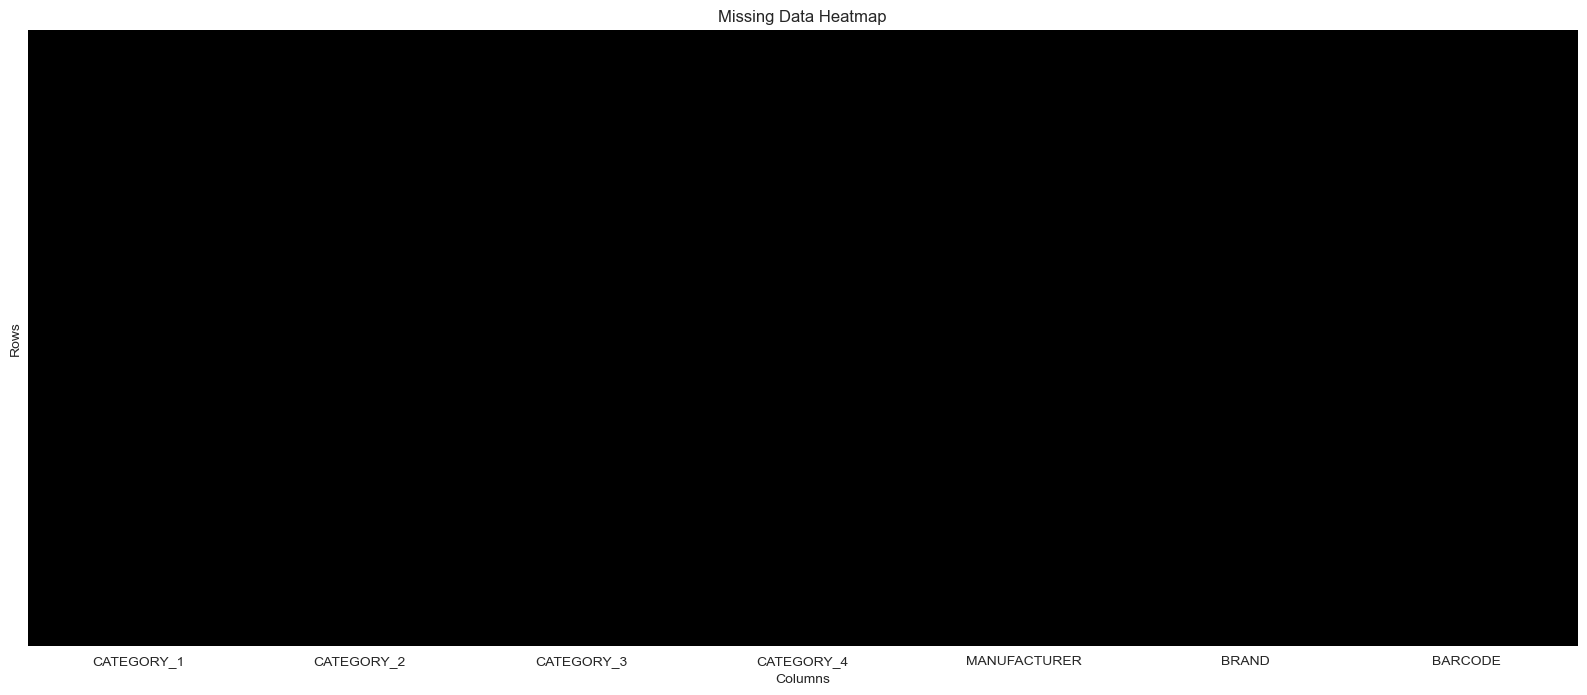

In [1154]:
#### This Data set has been cleaned lets see it one more time

from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df_product.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

In [1155]:
df_product.isna().any()                 #### We took care of all the missing values here


CATEGORY_1      False
CATEGORY_2      False
CATEGORY_3      False
CATEGORY_4      False
MANUFACTURER    False
BRAND           False
BARCODE         False
dtype: bool

Text(0.5, 1.0, 'Missing Data Heatmap')

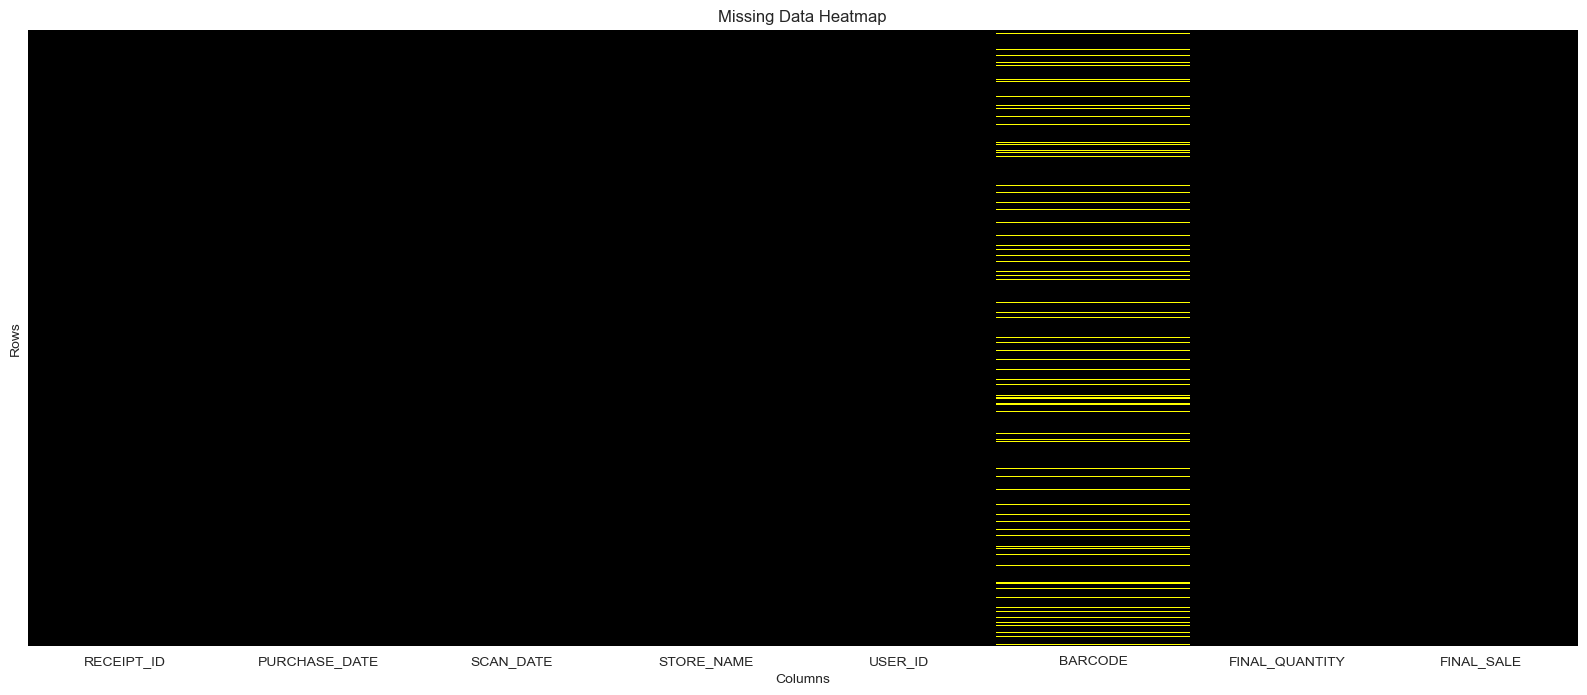

In [1156]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df_transaction.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')                    #### Similar treatment for the Transaction data set

In [1157]:
df_transaction.isna().any()                 #### We only have missing values in barcode on this data set


RECEIPT_ID        False
PURCHASE_DATE     False
SCAN_DATE         False
STORE_NAME        False
USER_ID           False
BARCODE            True
FINAL_QUANTITY    False
FINAL_SALE        False
dtype: bool

In [1158]:
df_transaction.BARCODE.value_counts(dropna=False)                #### We have 5735 null values or missing values to take care of

BARCODE
NaN             5735
7.874222e+10     181
5.111115e+11     168
5.111110e+11     163
7.874229e+10     158
                ... 
1.605611e+07       2
2.220094e+10       2
7.055220e+10       2
7.137333e+11       2
7.432310e+10       2
Name: count, Length: 11028, dtype: int64

In [1159]:
df_transaction.BARCODE[2]

78742229751.0

In [1160]:
# Check the length of non-null barcodes
df_transaction['BARCODE_LENGTH'] = df_transaction['BARCODE'].dropna().apply(lambda x: len(str(int(x))))
print(df_transaction['BARCODE_LENGTH'].value_counts())

#### Because the length is all over the place we will just go for the majority number which is 11 digits

BARCODE_LENGTH
11.0    32589
12.0    10500
10.0      316
5.0       247
8.0       150
7.0       150
13.0       86
6.0        40
2.0         8
9.0         4
4.0         4
Name: count, dtype: int64


In [1161]:
import uuid

# Function to generate unique dummy barcodes
def generate_dummy_barcode():
    return str(uuid.uuid4().int)[:11]  # 11-digit dummy barcode

# Fill missing barcodes with unique placeholders
df_transaction['BARCODE'] = df_transaction['BARCODE'].apply(lambda x: generate_dummy_barcode() if pd.isna(x) else x)


In [1162]:
df_transaction.BARCODE.value_counts(dropna=False)                #### No null values here

BARCODE
78742223759.0     181
511111503972.0    168
511111001768.0    163
78742285443.0     158
311111224057.0    149
                 ... 
11716032406         1
33432021239         1
49759551512         1
24905873199         1
31579338462         1
Name: count, Length: 16762, dtype: int64

In [1163]:
df_transaction.drop(columns='BARCODE_LENGTH',inplace=True)

In [1164]:
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,11906863057,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751.0,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.00,


In [1165]:
df_transaction.FINAL_SALE.value_counts(dropna=False)

FINAL_SALE
         12486
1.25      1313
1.00       732
2.99       587
1.99       581
         ...  
16.47        1
10.92        1
61.30        1
13.14        1
42.38        1
Name: count, Length: 1435, dtype: int64

In [1166]:
# Convert empty strings to NaN
df_transaction['FINAL_SALE'] = df_transaction['FINAL_SALE'].replace(' ', np.nan)


In [1167]:
df_transaction.FINAL_SALE.value_counts(dropna=False)

FINAL_SALE
NaN      12486
1.25      1313
1.00       732
2.99       587
1.99       581
         ...  
16.47        1
10.92        1
61.30        1
13.14        1
42.38        1
Name: count, Length: 1435, dtype: int64

In [1168]:
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.00,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,11906863057,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751.0,1.00,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.00,NaN


In [1169]:
df_transaction[['FINAL_QUANTITY','FINAL_SALE']]

,FINAL_QUANTITY,FINAL_SALE
0,1.00,NaN
1,zero,1.49
2,1.00,NaN
3,zero,3.49
4,1.00,NaN
...,...,...
49995,2.00,1.18
49996,1.00,2.00
49997,1.00,20.96
49998,1.00,3.00


In [1170]:
# Replace 'zero' with 0 and convert to numeric

df_transaction['FINAL_QUANTITY'] = df_transaction['FINAL_QUANTITY'].replace('zero', 0)
df_transaction['FINAL_QUANTITY'] = pd.to_numeric(df_transaction['FINAL_QUANTITY'], errors='coerce')


In [1171]:
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,11906863057,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751.0,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.0,NaN


In [1172]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      49829 non-null  object 
 1   PURCHASE_DATE   49829 non-null  object 
 2   SCAN_DATE       49829 non-null  object 
 3   STORE_NAME      49829 non-null  object 
 4   USER_ID         49829 non-null  object 
 5   BARCODE         49829 non-null  object 
 6   FINAL_QUANTITY  49829 non-null  float64
 7   FINAL_SALE      37343 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.4+ MB


In [1173]:
# Filling missing FINAL_SALE with the median

median_sale = df_transaction['FINAL_SALE'].median()
df_transaction['FINAL_SALE'] = df_transaction['FINAL_SALE'].fillna(median_sale)

#### We getting an error so lets try to figure this out

TypeError: Cannot convert [nan '1.49' nan ... '20.96' '3.00' '5.48'] to numeric

In [1181]:
# Check for non-numeric values in FINAL_SALE
non_numeric_values = df_transaction[pd.to_numeric(df_transaction['FINAL_SALE'], errors='coerce').isna()]['FINAL_SALE'].unique()
print(non_numeric_values)


[nan]


In [1182]:
# Replace 'zero' and empty strings with NaN
df_transaction['FINAL_SALE'] = df_transaction['FINAL_SALE'].replace(['zero', '', 'NaN'], np.nan)


In [1183]:
# Convert to numeric, coercing errors to NaN
df_transaction['FINAL_SALE'] = pd.to_numeric(df_transaction['FINAL_SALE'], errors='coerce')


In [1184]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      49829 non-null  object 
 1   PURCHASE_DATE   49829 non-null  object 
 2   SCAN_DATE       49829 non-null  object 
 3   STORE_NAME      49829 non-null  object 
 4   USER_ID         49829 non-null  object 
 5   BARCODE         49829 non-null  object 
 6   FINAL_QUANTITY  49829 non-null  float64
 7   FINAL_SALE      37343 non-null  float64
dtypes: float64(2), object(6)
memory usage: 4.4+ MB


In [1185]:
# Calculate the median
median_sale = df_transaction['FINAL_SALE'].median()

# Fill missing values with the median
df_transaction['FINAL_SALE'] = df_transaction['FINAL_SALE'].fillna(median_sale)


#### Why did we use median and not mean in this numerical column for final sale

#### Because we have not done any normal distribution or taken care of outliers we dont know for certain if it has the outliers or not
#### Mean can be heavily skewed due to outliers while median does not have much flexibility so hence we going for median
#### Remember if its normally distributed then it means mean=median=mode if its right skewed means mean >= median >= mode

In [1187]:
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,3.00
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,11906863057,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751.0,1.0,3.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.0,3.00


Text(0.5, 1.0, 'Missing Data Heatmap')

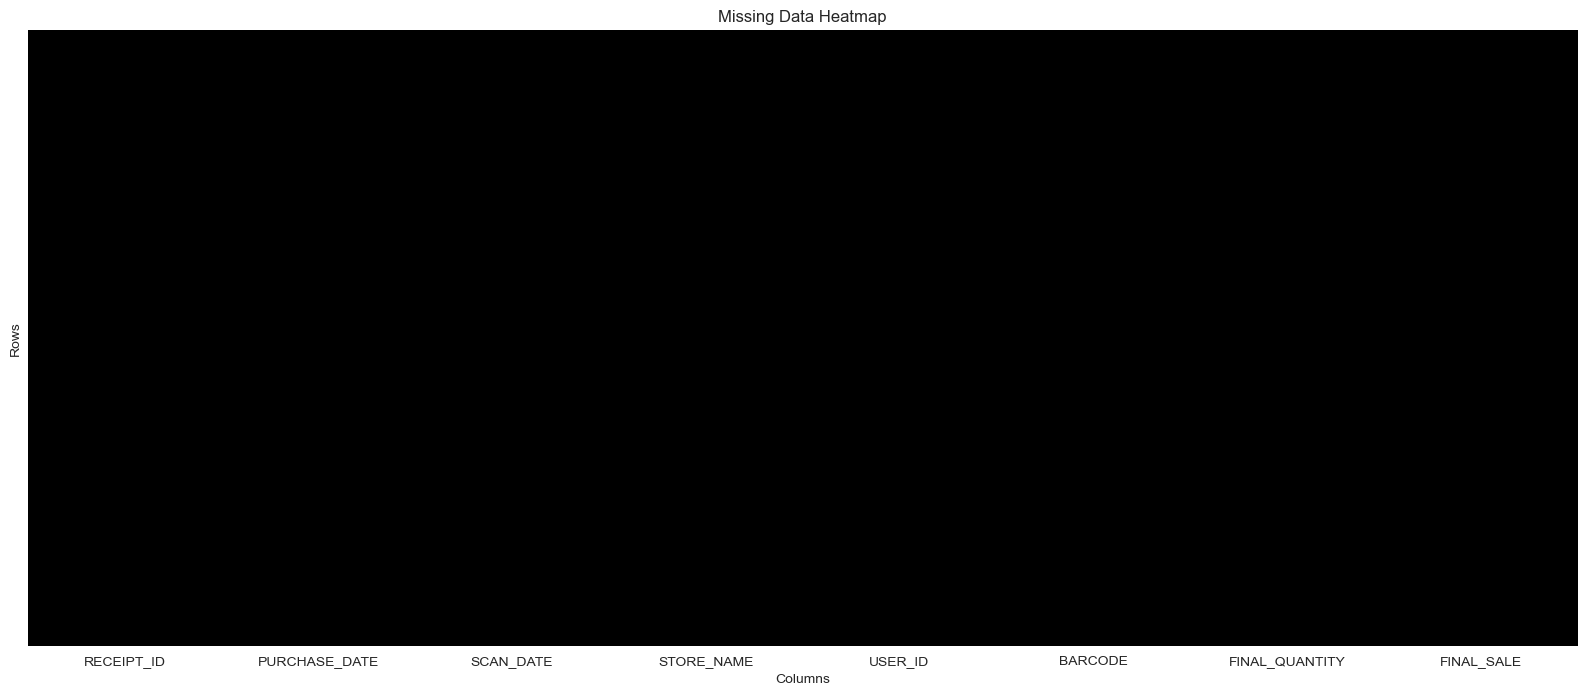

In [1188]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df_transaction.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

In [1189]:
df_transaction.isna().any()                 #### No missing values anymore


RECEIPT_ID        False
PURCHASE_DATE     False
SCAN_DATE         False
STORE_NAME        False
USER_ID           False
BARCODE           False
FINAL_QUANTITY    False
FINAL_SALE        False
dtype: bool

Text(0.5, 1.0, 'Missing Data Heatmap')

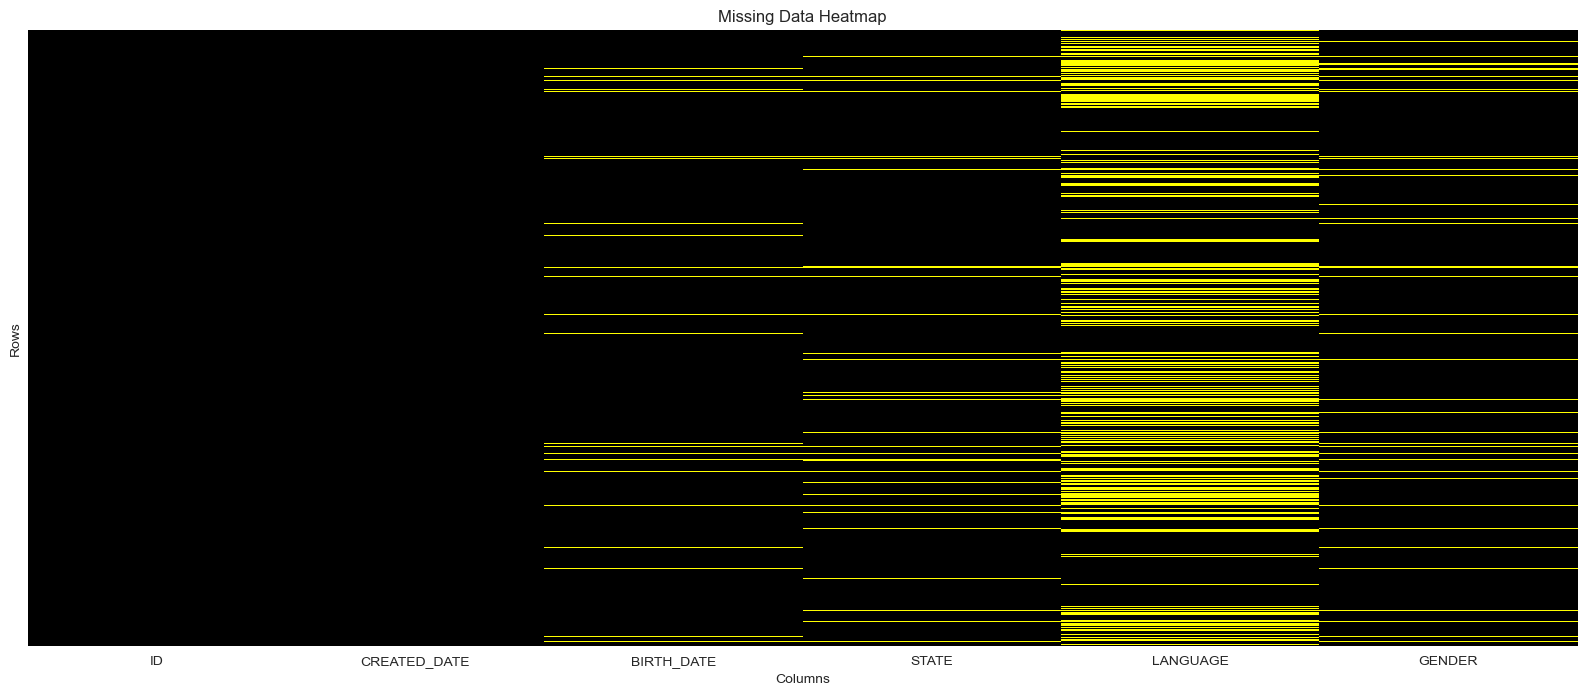

In [1190]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df_user.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

In [1191]:
df_user.isna().any()                 #### almost every feature has some missing values


ID              False
CREATED_DATE    False
BIRTH_DATE       True
STATE            True
LANGUAGE         True
GENDER           True
dtype: bool

In [1192]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [1193]:
df_user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [1194]:
df_user.BIRTH_DATE.value_counts(dropna=False)

BIRTH_DATE
NaN                          3675
1970-01-01 00:00:00.000 Z    1272
1979-12-11 08:00:00.000 Z      63
2000-12-12 00:00:00.000 Z      28
2000-12-31 00:00:00.000 Z      23
                             ... 
2004-02-21 08:00:00.000 Z       1
1956-02-09 05:00:00.000 Z       1
1974-07-13 00:00:00.000 Z       1
1991-05-23 04:00:00.000 Z       1
1995-06-09 04:00:00.000 Z       1
Name: count, Length: 54722, dtype: int64

In [1195]:
# Convert BIRTH_DATE to datetime

df_user['BIRTH_DATE'] = pd.to_datetime(df_user['BIRTH_DATE'], errors='coerce')


In [1196]:
# Fill missing values with the most common birth date

mode_birthdate = df_user['BIRTH_DATE'].mode()[0]
df_user['BIRTH_DATE'] = df_user['BIRTH_DATE'].fillna(mode_birthdate)


In [1197]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  object             
 2   BIRTH_DATE    100000 non-null  datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 4.6+ MB


In [1198]:
df_user.STATE.value_counts(dropna=False)              #### NaN is 4812 

STATE
TX     9028
FL     8921
CA     8589
NY     5703
NaN    4812
IL     3794
GA     3718
PA     3644
OH     3519
NC     3399
NJ     2899
MI     2582
VA     2400
IN     2213
TN     2165
AL     1792
SC     1773
KY     1731
AZ     1728
MO     1652
MD     1636
MA     1523
WI     1389
PR     1361
LA     1290
WA     1234
CO     1139
MN     1125
CT     1110
OK     1100
AR     1011
MS      960
IA      933
NV      837
KS      835
OR      700
WV      674
UT      593
DE      492
NE      487
NM      452
ME      368
NH      359
HI      350
ID      350
AK      297
RI      284
DC      241
SD      205
ND      185
MT      169
WY      138
VT      111
Name: count, dtype: int64

In [1199]:
# Check the most common state
most_common_state = df_user['STATE'].mode()[0]
print(f"Most Common State: {most_common_state}")


Most Common State: TX


In [1200]:
#### In this case we will opt for Unknown althout we could have done TX too so it depends on you

In [1201]:
# Fill NaN with the most common state

df_user['STATE'] = df_user['STATE'].fillna(most_common_state)


In [1202]:
df_user.info()                     #### Now we will go for Language missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  object             
 2   BIRTH_DATE    100000 non-null  datetime64[ns, UTC]
 3   STATE         100000 non-null  object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 4.6+ MB


In [1203]:
df_user.LANGUAGE.value_counts(dropna=False)

LANGUAGE
en        63403
NaN       30508
es-419     6089
Name: count, dtype: int64

In [1204]:
# Fill NaN with the most common language (mode)
#### This is quite easy decision as English is spoken the most so there is no question why we opted for mode in this case

most_common_language = df_user['LANGUAGE'].mode()[0]
df_user['LANGUAGE'] = df_user['LANGUAGE'].fillna(most_common_language)


In [1205]:
df_user.LANGUAGE.value_counts(dropna=False)

LANGUAGE
en        93911
es-419     6089
Name: count, dtype: int64

In [1206]:
df_user.GENDER.value_counts(dropna=False)

GENDER
female                    64240
male                      25829
NaN                        5892
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64

In [1207]:
#### We will try to make it more precise and concise by making it into 4 categories

# Define a mapping dictionary
gender_mapping = {
    'male': 'Male',
    'female': 'Female',
    'transgender': 'Non-Binary',
    'non_binary': 'Non-Binary',
    'Non-Binary': 'Non-Binary',
    'not_listed': 'Non-Binary',
    'unknown': 'Prefer Not to Say',
    'not_specified': 'Prefer Not to Say',
    'prefer_not_to_say': 'Prefer Not to Say',
    'Prefer not to say': 'Prefer Not to Say',
    'My gender isn\'t listed': 'Non-Binary',
    'NaN': 'Prefer Not to Say',  # For textual 'NaN' if exists
    None: 'Prefer Not to Say'     # For actual missing values
}

# Replace NaN values with 'Prefer Not to Say'
df_user['GENDER'] = df_user['GENDER'].fillna('Prefer Not to Say')

# Apply the mapping
df_user['GENDER'] = df_user['GENDER'].replace(gender_mapping)

In [1208]:
df_user.GENDER.value_counts(dropna=False)                     #### This looks more precise

GENDER
Female               64240
Male                 25829
Prefer Not to Say     7467
Non-Binary            2464
Name: count, dtype: int64

Text(0.5, 1.0, 'Missing Data Heatmap')

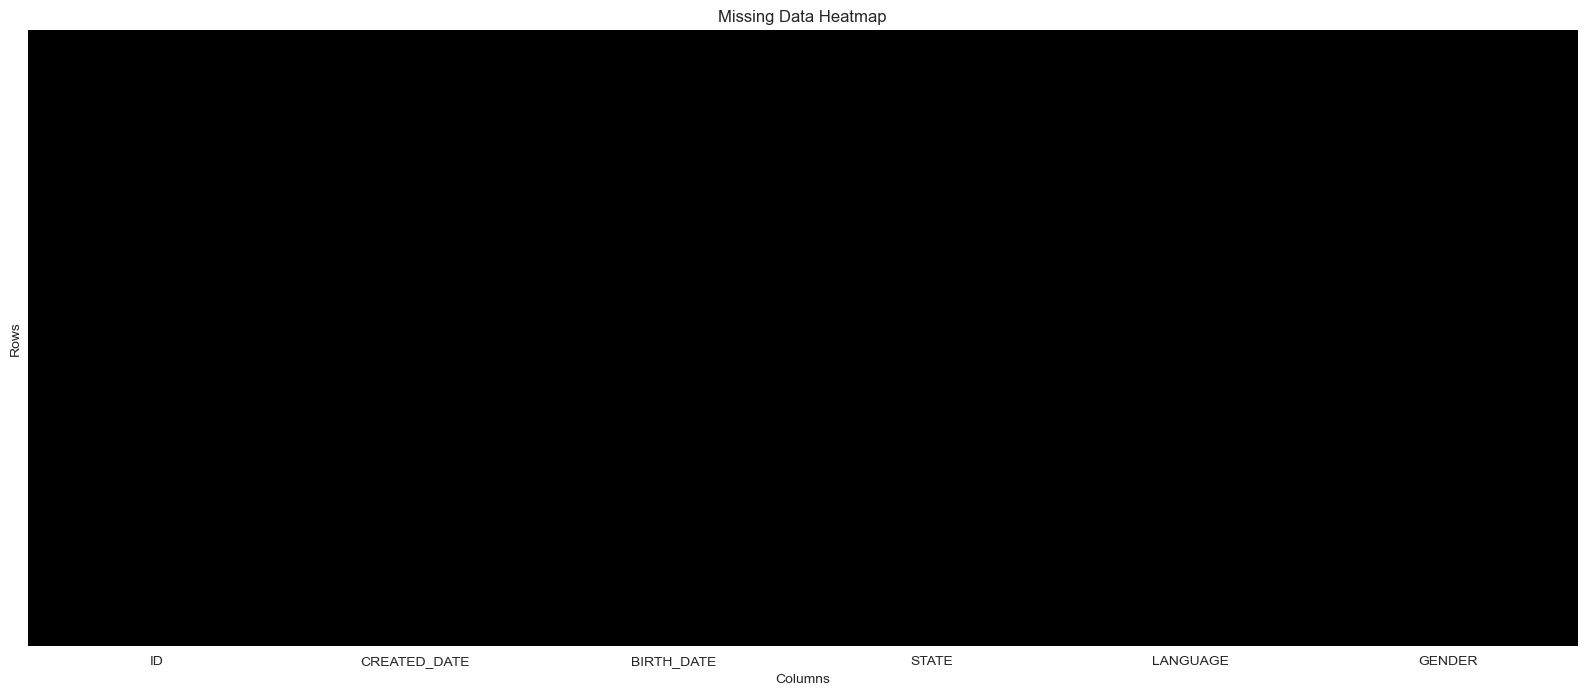

In [1209]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df_user.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

In [1210]:
df_user.isna().any()                #### We took care of all the missing values here

ID              False
CREATED_DATE    False
BIRTH_DATE      False
STATE           False
LANGUAGE        False
GENDER          False
dtype: bool

In [1211]:
######################################################################
############## Part IV - FEATURE ENGINEERING
######################################################################


In [1212]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845337 non-null  object
 1   CATEGORY_2    845337 non-null  object
 2   CATEGORY_3    845337 non-null  object
 3   CATEGORY_4    845337 non-null  object
 4   MANUFACTURER  845337 non-null  object
 5   BRAND         845337 non-null  object
 6   BARCODE       845337 non-null  object
dtypes: object(7)
memory usage: 83.8+ MB


In [1213]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      49829 non-null  object 
 1   PURCHASE_DATE   49829 non-null  object 
 2   SCAN_DATE       49829 non-null  object 
 3   STORE_NAME      49829 non-null  object 
 4   USER_ID         49829 non-null  object 
 5   BARCODE         49829 non-null  object 
 6   FINAL_QUANTITY  49829 non-null  float64
 7   FINAL_SALE      49829 non-null  float64
dtypes: float64(2), object(6)
memory usage: 4.4+ MB


In [1214]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  object             
 2   BIRTH_DATE    100000 non-null  datetime64[ns, UTC]
 3   STATE         100000 non-null  object             
 4   LANGUAGE      100000 non-null  object             
 5   GENDER        100000 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 4.6+ MB


#### We will now merge all three tables into as a final dataset

In [1248]:
# First join Users with Transactions
user_transactions = pd.merge(df_user, df_transaction, left_on='ID', right_on='USER_ID', how='inner')

# Then join with Products
full_data = pd.merge(user_transactions, df_product, left_on='BARCODE', right_on='BARCODE', how='inner')

full_data.head()

#### But this will give us only 144 rows due to the barcode

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,62c303aebaa38d1a1f6d0d51,2022-07-04 15:13:50.000 Z,1958-09-27 00:00:00+00:00,FL,en,Female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951 Z,WALMART,62c303aebaa38d1a1f6d0d51,78742222349.0,1.0,3.00,Snacks,Snack Cakes,Donut Snack Cakes,Unknown,WALMART INC.,FRESHNESS GUARANTEED
1,62c303aebaa38d1a1f6d0d51,2022-07-04 15:13:50.000 Z,1958-09-27 00:00:00+00:00,FL,en,Female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951 Z,WALMART,62c303aebaa38d1a1f6d0d51,78742222349.0,1.0,3.24,Snacks,Snack Cakes,Donut Snack Cakes,Unknown,WALMART INC.,FRESHNESS GUARANTEED
2,5fd4fb485f410d44bae3a776,2020-12-12 17:18:00.000 Z,1979-01-23 00:00:00+00:00,CA,es-419,Female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267 Z,TARGET,5fd4fb485f410d44bae3a776,22400643366.0,2.0,3.00,Health & Wellness,Hair Care,Hair Styling Products,Unknown,UNILEVER,TRESEMMÉ
3,5fd4fb485f410d44bae3a776,2020-12-12 17:18:00.000 Z,1979-01-23 00:00:00+00:00,CA,es-419,Female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267 Z,TARGET,5fd4fb485f410d44bae3a776,22400643366.0,2.0,14.58,Health & Wellness,Hair Care,Hair Styling Products,Unknown,UNILEVER,TRESEMMÉ
4,5b441360be53340f289b0795,2018-07-10 02:01:04.000 Z,1982-09-27 06:00:00+00:00,IL,en,Female,a7e6adf6-3dac-497f-90f1-7f371c639a1f,2024-07-22,2024-07-22 09:49:41.406 Z,TARGET,5b441360be53340f289b0795,2700717433990.0,0.0,7.99,Health & Wellness,Bath & Body,Body Wash,Unknown,UNILEVER,AXE


In [1250]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   ID              144 non-null    object             
 1   CREATED_DATE    144 non-null    object             
 2   BIRTH_DATE      144 non-null    datetime64[ns, UTC]
 3   STATE           144 non-null    object             
 4   LANGUAGE        144 non-null    object             
 5   GENDER          144 non-null    object             
 6   RECEIPT_ID      144 non-null    object             
 7   PURCHASE_DATE   144 non-null    object             
 8   SCAN_DATE       144 non-null    object             
 9   STORE_NAME      144 non-null    object             
 10  USER_ID         144 non-null    object             
 11  BARCODE         144 non-null    object             
 12  FINAL_QUANTITY  144 non-null    float64            
 13  FINAL_SALE      144 non-null    flo

#### Problem is here that matching columns for ID and Barcode is 144 only

#### Now we will do the merging first and then take care of the missing values

In [1253]:
import pandas as pd

# Load the datasets
user_df = pd.read_csv('USER_TAKEHOME.csv')
transaction_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')
product_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')

# Strip and standardize IDs for consistency
user_df['ID'] = user_df['ID'].astype(str).str.strip().str.upper()
transaction_df['USER_ID'] = transaction_df['USER_ID'].astype(str).str.strip().str.upper()

# Join user and transaction data
user_transaction_joined = pd.merge(user_df, transaction_df, left_on='ID', right_on='USER_ID', how='inner')

# Join the resulting dataframe with product data using the barcode
full_joined_data = pd.merge(user_transaction_joined, product_df, left_on='BARCODE', right_on='BARCODE', how='inner')

# Display the number of rows after joining all three tables
full_joined_data.shape[0]


96744

In [1255]:
full_joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96744 entries, 0 to 96743
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              96744 non-null  object 
 1   CREATED_DATE    96744 non-null  object 
 2   BIRTH_DATE      96744 non-null  object 
 3   STATE           96744 non-null  object 
 4   LANGUAGE        96744 non-null  object 
 5   GENDER          96744 non-null  object 
 6   RECEIPT_ID      96744 non-null  object 
 7   PURCHASE_DATE   96744 non-null  object 
 8   SCAN_DATE       96744 non-null  object 
 9   STORE_NAME      96744 non-null  object 
 10  USER_ID         96744 non-null  object 
 11  BARCODE         144 non-null    float64
 12  FINAL_QUANTITY  96744 non-null  object 
 13  FINAL_SALE      96744 non-null  object 
 14  CATEGORY_1      96744 non-null  object 
 15  CATEGORY_2      78432 non-null  object 
 16  CATEGORY_3      52284 non-null  object 
 17  CATEGORY_4      5366 non-null  

#### We will drop Barcode because its way too low count and its just not possible to justify its imputations

In [1257]:
full_joined_data.drop(columns='BARCODE',inplace=True)

full_joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96744 entries, 0 to 96743
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              96744 non-null  object
 1   CREATED_DATE    96744 non-null  object
 2   BIRTH_DATE      96744 non-null  object
 3   STATE           96744 non-null  object
 4   LANGUAGE        96744 non-null  object
 5   GENDER          96744 non-null  object
 6   RECEIPT_ID      96744 non-null  object
 7   PURCHASE_DATE   96744 non-null  object
 8   SCAN_DATE       96744 non-null  object
 9   STORE_NAME      96744 non-null  object
 10  USER_ID         96744 non-null  object
 11  FINAL_QUANTITY  96744 non-null  object
 12  FINAL_SALE      96744 non-null  object
 13  CATEGORY_1      96744 non-null  object
 14  CATEGORY_2      78432 non-null  object
 15  CATEGORY_3      52284 non-null  object
 16  CATEGORY_4      5366 non-null   object
 17  MANUFACTURER    90810 non-null  object
 18  BRAND 

In [1259]:
full_joined_data.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,62C303AEBAA38D1A1F6D0D51,2022-07-04 15:13:50.000 Z,1958-09-27 00:00:00.000 Z,FL,en,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951 Z,WALMART,62C303AEBAA38D1A1F6D0D51,1.00,,Snacks,Snack Cakes,Donut Snack Cakes,NaN,WALMART INC.,FRESHNESS GUARANTEED
1,62C303AEBAA38D1A1F6D0D51,2022-07-04 15:13:50.000 Z,1958-09-27 00:00:00.000 Z,FL,en,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951 Z,WALMART,62C303AEBAA38D1A1F6D0D51,1.00,3.24,Snacks,Snack Cakes,Donut Snack Cakes,NaN,WALMART INC.,FRESHNESS GUARANTEED
2,5FD4FB485F410D44BAE3A776,2020-12-12 17:18:00.000 Z,1979-01-23 00:00:00.000 Z,CA,es-419,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267 Z,TARGET,5FD4FB485F410D44BAE3A776,2.00,,Health & Wellness,Hair Care,Hair Styling Products,NaN,UNILEVER,TRESEMMÉ
3,5FD4FB485F410D44BAE3A776,2020-12-12 17:18:00.000 Z,1979-01-23 00:00:00.000 Z,CA,es-419,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267 Z,TARGET,5FD4FB485F410D44BAE3A776,2.00,14.58,Health & Wellness,Hair Care,Hair Styling Products,NaN,UNILEVER,TRESEMMÉ
4,5B441360BE53340F289B0795,2018-07-10 02:01:04.000 Z,1982-09-27 06:00:00.000 Z,IL,en,female,a7e6adf6-3dac-497f-90f1-7f371c639a1f,2024-07-22,2024-07-22 09:49:41.406 Z,TARGET,5B441360BE53340F289B0795,zero,7.99,Health & Wellness,Bath & Body,Body Wash,NaN,UNILEVER,AXE


In [1261]:
# Convert FINAL_SALE and FINAL_QUANTITY to numeric
full_joined_data['FINAL_SALE'] = pd.to_numeric(full_joined_data['FINAL_SALE'], errors='coerce')
full_joined_data['FINAL_QUANTITY'] = pd.to_numeric(full_joined_data['FINAL_QUANTITY'], errors='coerce')


In [1263]:
median_sale = full_joined_data['FINAL_SALE'].median()

# Fill missing values with the median
full_joined_data['FINAL_SALE'] = full_joined_data['FINAL_SALE'].fillna(median_sale)


In [1265]:
full_joined_data['FINAL_QUANTITY'] = full_joined_data.FINAL_QUANTITY.fillna(0)

In [1267]:
from datetime import datetime

# Handling missing values
# Fill missing values for categorical columns with 'Unknown'
categorical_columns = ['STATE', 'LANGUAGE', 'GENDER', 'CATEGORY_1', 'CATEGORY_2', 
                        'CATEGORY_3', 'CATEGORY_4', 'BRAND', 'MANUFACTURER', 'STORE_NAME']

for col in categorical_columns:
    if col in full_joined_data.columns:
        full_joined_data[col] = full_joined_data[col].fillna('Unknown')


# Convert date columns to datetime
date_columns = ['CREATED_DATE', 'BIRTH_DATE', 'PURCHASE_DATE', 'SCAN_DATE']

for col in date_columns:
    if col in full_joined_data.columns:
        full_joined_data[col] = pd.to_datetime(full_joined_data[col], errors='coerce').dt.tz_localize(None)




In [1269]:
# Convert FINAL_SALE and FINAL_QUANTITY to float
full_joined_data['FINAL_SALE'] = pd.to_numeric(full_joined_data['FINAL_SALE'], errors='coerce').astype(float)
full_joined_data['FINAL_QUANTITY'] = pd.to_numeric(full_joined_data['FINAL_QUANTITY'], errors='coerce').astype(float)


In [1271]:
# Create Age Feature from BIRTH_DATE
full_joined_data['AGE'] = (datetime.now() - full_joined_data['BIRTH_DATE']).dt.days // 365

# Create Membership Duration Feature (account age in days)
full_joined_data['MEMBERSHIP_DURATION'] = (datetime.now() - full_joined_data['CREATED_DATE']).dt.days

# Total Sale Feature (if FINAL_SALE represents unit price)
full_joined_data['TOTAL_SALE'] = full_joined_data['FINAL_SALE'] * full_joined_data['FINAL_QUANTITY']

# Extract Year and Month from PURCHASE_DATE for time-based analysis
full_joined_data['PURCHASE_YEAR'] = full_joined_data['PURCHASE_DATE'].dt.year
full_joined_data['PURCHASE_MONTH'] = full_joined_data['PURCHASE_DATE'].dt.month

# Categorize Age Groups
def categorize_age(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 18:
        return 'Under 18'
    elif 18 <= age < 30:
        return '18-29'
    elif 30 <= age < 45:
        return '30-44'
    elif 45 <= age < 60:
        return '45-59'
    else:
        return '60+'

full_joined_data['AGE_GROUP'] = full_joined_data['AGE'].apply(categorize_age)

# Convert categorical columns to category dtype
final_categorical_cols = ['STATE', 'LANGUAGE', 'GENDER', 'CATEGORY_1', 'CATEGORY_2', 
                           'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER', 'BRAND', 'AGE_GROUP']

for col in final_categorical_cols:
    if col in full_joined_data.columns:
        full_joined_data[col] = full_joined_data[col].astype('category')

# Confirm changes
full_joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96744 entries, 0 to 96743
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   96744 non-null  object        
 1   CREATED_DATE         96744 non-null  datetime64[ns]
 2   BIRTH_DATE           96744 non-null  datetime64[ns]
 3   STATE                96744 non-null  category      
 4   LANGUAGE             96744 non-null  category      
 5   GENDER               96744 non-null  category      
 6   RECEIPT_ID           96744 non-null  object        
 7   PURCHASE_DATE        96744 non-null  datetime64[ns]
 8   SCAN_DATE            96744 non-null  datetime64[ns]
 9   STORE_NAME           96744 non-null  object        
 10  USER_ID              96744 non-null  object        
 11  FINAL_QUANTITY       96744 non-null  float64       
 12  FINAL_SALE           96744 non-null  float64       
 13  CATEGORY_1           96744 non-

In [1273]:
full_joined_data.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,...,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,AGE,MEMBERSHIP_DURATION,TOTAL_SALE,PURCHASE_YEAR,PURCHASE_MONTH,AGE_GROUP
0,62C303AEBAA38D1A1F6D0D51,2022-07-04 15:13:50,1958-09-27 00:00:00,FL,en,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951,WALMART,...,Donut Snack Cakes,Unknown,WALMART INC.,FRESHNESS GUARANTEED,66,944,2.99,2024,6,60+
1,62C303AEBAA38D1A1F6D0D51,2022-07-04 15:13:50,1958-09-27 00:00:00,FL,en,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951,WALMART,...,Donut Snack Cakes,Unknown,WALMART INC.,FRESHNESS GUARANTEED,66,944,3.24,2024,6,60+
2,5FD4FB485F410D44BAE3A776,2020-12-12 17:18:00,1979-01-23 00:00:00,CA,es-419,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267,TARGET,...,Hair Styling Products,Unknown,UNILEVER,TRESEMMÉ,46,1513,5.98,2024,8,45-59
3,5FD4FB485F410D44BAE3A776,2020-12-12 17:18:00,1979-01-23 00:00:00,CA,es-419,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267,TARGET,...,Hair Styling Products,Unknown,UNILEVER,TRESEMMÉ,46,1513,29.16,2024,8,45-59
4,5B441360BE53340F289B0795,2018-07-10 02:01:04,1982-09-27 06:00:00,IL,en,female,a7e6adf6-3dac-497f-90f1-7f371c639a1f,2024-07-22,2024-07-22 09:49:41.406,TARGET,...,Body Wash,Unknown,UNILEVER,AXE,42,2399,0.00,2024,7,30-44


In [1275]:
full_joined_data.LANGUAGE.value_counts(dropna=False)

LANGUAGE
en        96740
es-419        4
Name: count, dtype: int64

In [1277]:
full_joined_data['LANGUAGE'] = full_joined_data.LANGUAGE.map({'en':'English',
                       'es-419':'Spanish'})

In [1279]:
full_joined_data.GENDER.value_counts(dropna=False)

GENDER
female    88670
male       8074
Name: count, dtype: int64

In [1281]:
full_joined_data.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,...,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,AGE,MEMBERSHIP_DURATION,TOTAL_SALE,PURCHASE_YEAR,PURCHASE_MONTH,AGE_GROUP
0,62C303AEBAA38D1A1F6D0D51,2022-07-04 15:13:50,1958-09-27 00:00:00,FL,English,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951,WALMART,...,Donut Snack Cakes,Unknown,WALMART INC.,FRESHNESS GUARANTEED,66,944,2.99,2024,6,60+
1,62C303AEBAA38D1A1F6D0D51,2022-07-04 15:13:50,1958-09-27 00:00:00,FL,English,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951,WALMART,...,Donut Snack Cakes,Unknown,WALMART INC.,FRESHNESS GUARANTEED,66,944,3.24,2024,6,60+
2,5FD4FB485F410D44BAE3A776,2020-12-12 17:18:00,1979-01-23 00:00:00,CA,Spanish,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267,TARGET,...,Hair Styling Products,Unknown,UNILEVER,TRESEMMÉ,46,1513,5.98,2024,8,45-59
3,5FD4FB485F410D44BAE3A776,2020-12-12 17:18:00,1979-01-23 00:00:00,CA,Spanish,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267,TARGET,...,Hair Styling Products,Unknown,UNILEVER,TRESEMMÉ,46,1513,29.16,2024,8,45-59
4,5B441360BE53340F289B0795,2018-07-10 02:01:04,1982-09-27 06:00:00,IL,English,female,a7e6adf6-3dac-497f-90f1-7f371c639a1f,2024-07-22,2024-07-22 09:49:41.406,TARGET,...,Body Wash,Unknown,UNILEVER,AXE,42,2399,0.00,2024,7,30-44


#### Are there any data quality issues present?
#### Are there any fields that are challenging to understand?

CATEGORY_3 & CATEGORY_4:
High percentage of missing values makes these features difficult to interpret.
Their purpose and hierarchy in relation to CATEGORY_1 and CATEGORY_2 are unclear.

FINAL_SALE vs TOTAL_SALE:
Ambiguity regarding whether FINAL_SALE is per unit or aggregated, especially with extreme outliers present.

AGE Calculation:
Some unrealistic ages may exist due to incorrect BIRTH_DATE entries.

BARCODE Field:
The uniqueness and format of BARCODE values are inconsistent, with varying lengths.

In [1283]:
full_joined_data.AGE.mean()

50.335586703051355

In [1285]:
full_joined_data.AGE.std()

13.560825977033343

In [712]:
######################################################################
############## Part V - EDA
######################################################################

Text(0, 0.5, 'Age Ratio')

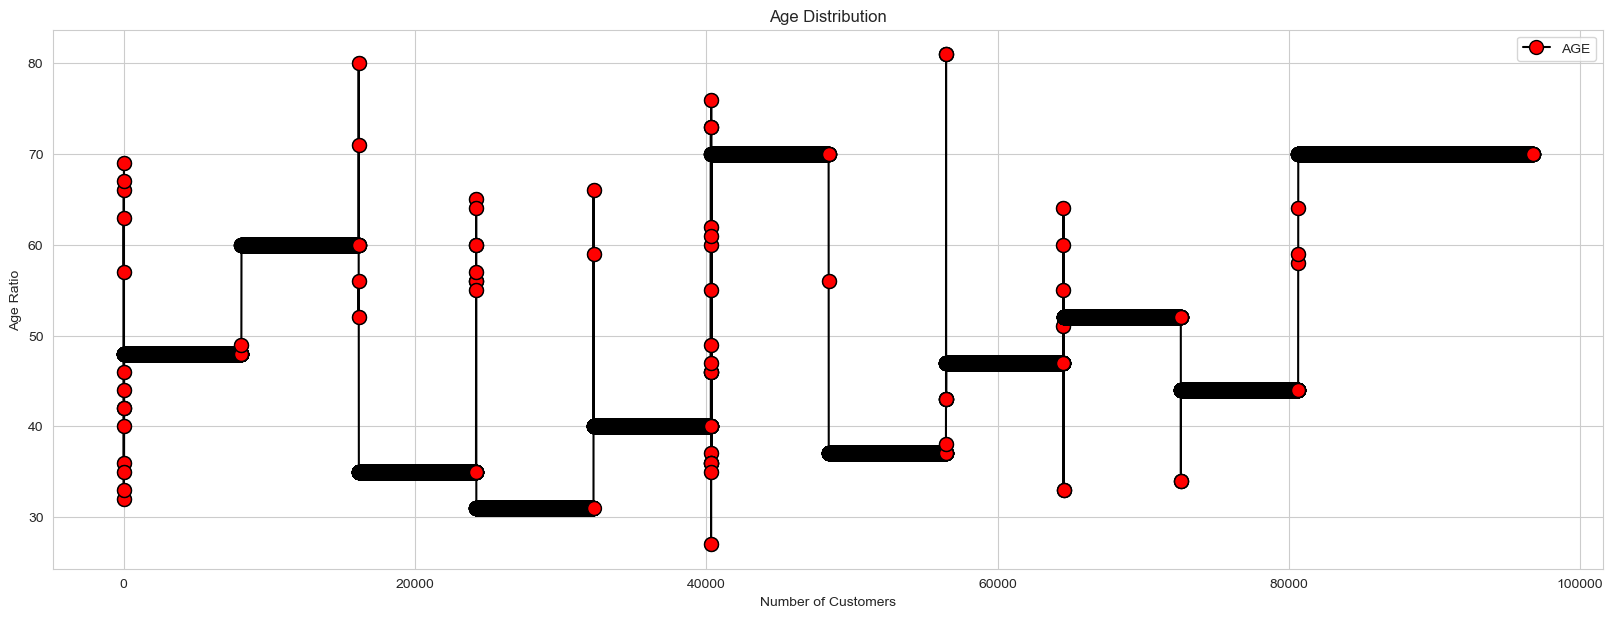

In [1287]:
full_joined_data['AGE'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10)

plt.title('Age Distribution')

plt.xlabel('Number of Customers')

plt.ylabel('Age Ratio')


#### seems like the mean is between 60-70

In [1289]:
mean_df = full_joined_data.AGE.mean()
std_df = full_joined_data.AGE.std()

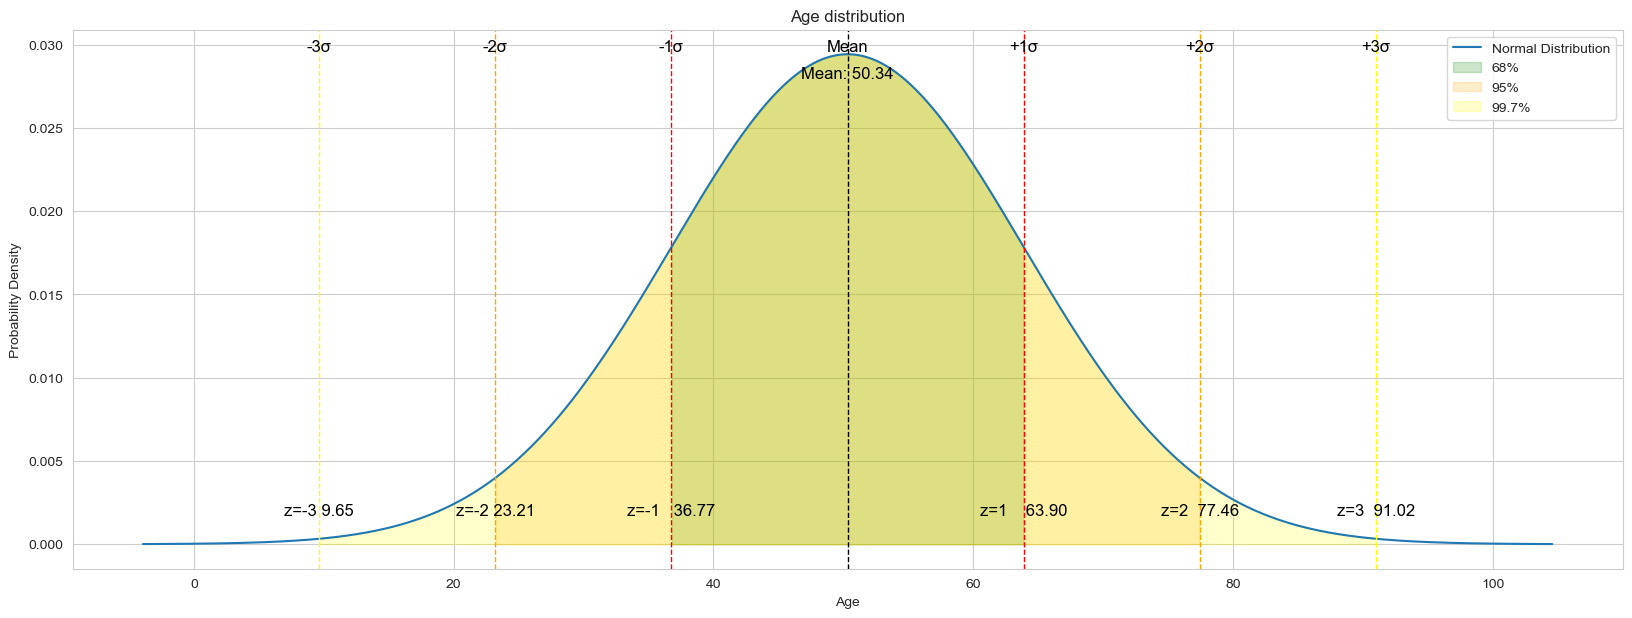

In [1291]:
#### Comprehensive time

from scipy.stats import norm

x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(20, 7))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### areas under the curve
plt.fill_between(x, y, where=(x >= mean_df - std_df) & (x <= mean_df + std_df), color='green', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x >= mean_df - 2*std_df) & (x <= mean_df + 2*std_df), color='orange', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x >= mean_df - 3*std_df) & (x <= mean_df + 3*std_df), color='yellow', alpha=0.2, label='99.7%')

#### mean and standard deviations
plt.axvline(mean_df, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 3*std_df, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 3*std_df, color='yellow', linestyle='dashed', linewidth=1)

plt.text(mean_df, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, plt.gca().get_ylim()[1]*0.05, f'z=1    {mean_df + std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, plt.gca().get_ylim()[1]*0.05, f'z=-1   {mean_df - std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=2  {mean_df + 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-2 {mean_df - 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=3  {mean_df + 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-3 {mean_df - 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')


#### annotate the plot
plt.text(mean_df, max(y), 'Mean', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, max(y), '-1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, max(y), '+1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, max(y), '-2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, max(y), '+2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, max(y), '-3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, max(y), '+3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')

#### labels
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Probability Density')

plt.legend()


#### from here we can clearly see all 3 levels of z_score either side and mean in the middle

In [1293]:
full_joined_data.AGE.mean()

50.335586703051355

In [1295]:
full_joined_data.AGE.std()

13.560825977033343

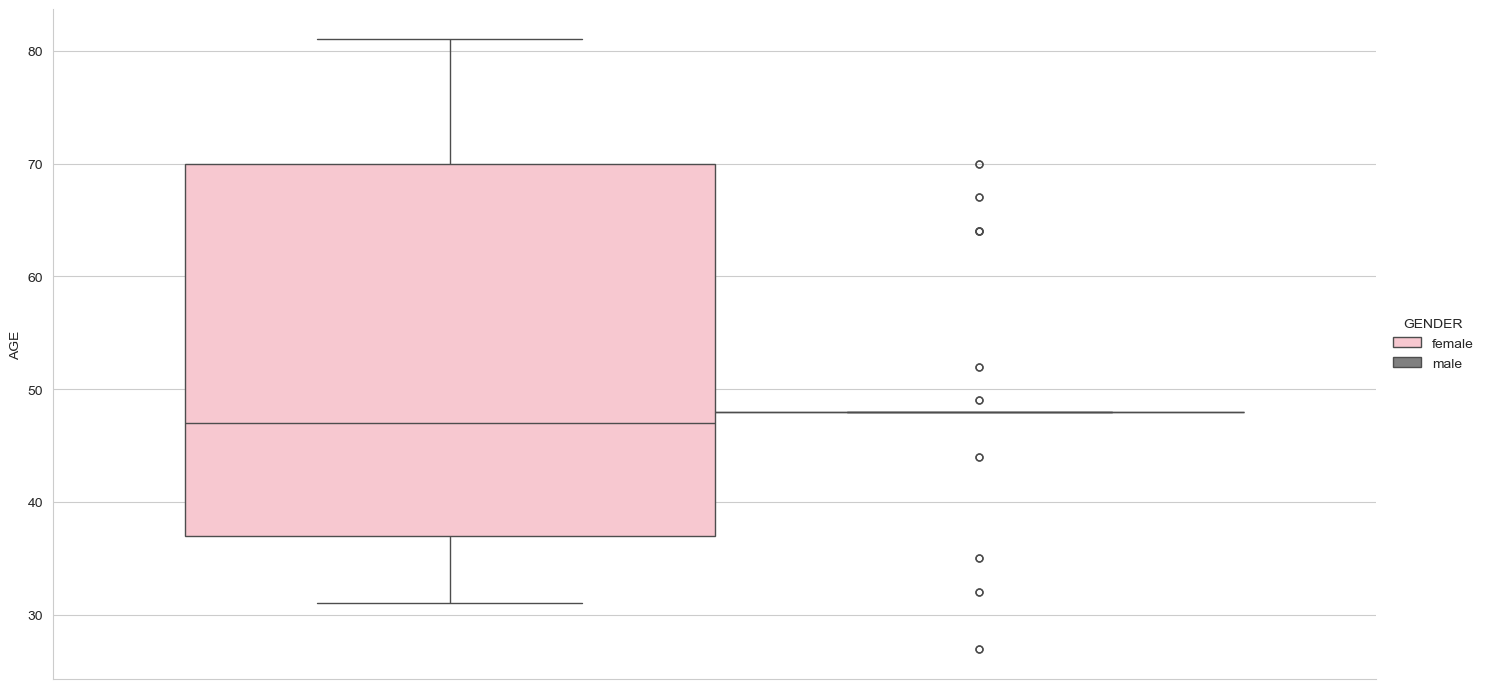

In [1297]:
custom = {'female':'pink',
          'male':'grey'}

sns.catplot(y='AGE',data=full_joined_data,kind='box',height=7,aspect=2,legend=True,hue='GENDER',palette=custom)

#### We dont see much outliers here honestly, lets confirm by using Stats and higher and lower fence method

In [1299]:
full_joined_data.GENDER.value_counts(dropna=False)

GENDER
female    88670
male       8074
Name: count, dtype: int64

In [1301]:
# Identifying outliers in the AGE column using IQR (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = full_joined_data['AGE'].quantile(0.25)
Q3 = full_joined_data['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

lower_fence, upper_fence

(8.125, 93.125)

In [1303]:
#### Anything which doesnt fall under this fence is regarded as outliers

full_joined_data.AGE.min()

27

In [1305]:
full_joined_data.AGE.max()                 #### Box plot was right about this and we do not have any outliers here

81

In [1307]:
# Re-create the GENERATION column in the DataFrame
def categorize_generation(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age >= 77:
        return 'Silent Generation'
    elif 58 <= age < 77:
        return 'Baby Boomers'
    elif 42 <= age < 58:
        return 'Gen X'
    elif 26 <= age < 42:
        return 'Millennials'
    elif 10 <= age < 26:
        return 'Gen Z'
    else:
        return 'Gen Alpha'

full_joined_data['GENERATION'] = full_joined_data['AGE'].apply(categorize_generation)

# Reload the DataFrame into the SQLite database
# Using SQLite to run SQL queries in Python
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the DataFrame into the SQLite database
full_joined_data.to_sql('full_data', conn, index=False, if_exists='replace')

# 1. Top 5 brands by receipts scanned among users 21 and over
query1 = """
SELECT BRAND, COUNT(DISTINCT RECEIPT_ID) AS Total_Receipts
FROM full_data
WHERE AGE >= 21
GROUP BY BRAND
ORDER BY Total_Receipts DESC
LIMIT 5;
"""

# 2. Top 5 brands by sales among users with accounts older than six months
query2 = """
SELECT BRAND, SUM(TOTAL_SALE) AS TOTAL_SALE
FROM full_data
WHERE MEMBERSHIP_DURATION >= 180
GROUP BY BRAND
ORDER BY TOTAL_SALE DESC
LIMIT 5;
"""

# 3. Percentage of sales in the Health & Wellness category by generation
query3 = """
SELECT GENERATION, 
       SUM(TOTAL_SALE) AS TOTAL_SALE,
       ROUND(100.0 * SUM(TOTAL_SALE) / (SELECT SUM(TOTAL_SALE) 
                                        FROM full_data 
                                        WHERE CATEGORY_1 = 'Health & Wellness'), 2) AS PERCENTAGE_SALES
FROM full_data
WHERE CATEGORY_1 = 'Health & Wellness'
GROUP BY GENERATION
ORDER BY TOTAL_SALE DESC;
"""

# Execute the queries
top_brands_receipts_21_plus_sql = pd.read_sql_query(query1, conn)
top_brands_sales_six_months_sql = pd.read_sql_query(query2, conn)
generation_sales_sql = pd.read_sql_query(query3, conn)

# Close the connection
conn.close()

top_brands_receipts_21_plus_sql


,BRAND,Total_Receipts
0,Unknown,14
1,NERDS CANDY,14
2,DOVE,14
3,SOUR PATCH KIDS,13
4,HERSHEY'S,13


In [1309]:
top_brands_sales_six_months_sql

,BRAND,TOTAL_SALE
0,Unknown,18861.75
1,COCA-COLA,1992.31
2,ANNIE'S HOMEGROWN GROCERY,1831.20
3,DOVE,1791.79
4,BAREFOOT,1754.90


In [1311]:
generation_sales_sql

,GENERATION,TOTAL_SALE,PERCENTAGE_SALES
0,Millennials,93208.66,52.91
1,Baby Boomers,55240.85,31.36
2,Gen X,27705.30,15.73


In [1313]:
# Re-create SQLite connection
conn = sqlite3.connect(':memory:')
full_joined_data.to_sql('full_data', conn, index=False, if_exists='replace')

# 1. Fetch’s Power Users (based on purchase frequency and total spending)
query_power_users = """
SELECT ID, 
       COUNT(DISTINCT RECEIPT_ID) AS Total_Receipts, 
       SUM(TOTAL_SALE) AS Total_Spend
FROM full_data
GROUP BY ID
ORDER BY Total_Receipts DESC, Total_Spend DESC
LIMIT 5;
"""

# 2. Leading Brand in the Dips & Salsa Category
query_leading_brand_dips_salsa = """
SELECT BRAND, 
       SUM(TOTAL_SALE) AS TOTAL_SALE
FROM full_data
WHERE CATEGORY_2 LIKE '%Dips & Salsa%'
GROUP BY BRAND
ORDER BY TOTAL_SALE DESC
LIMIT 1;
"""

# 3. Year-over-Year Growth of Fetch
query_yoy_growth = """
SELECT STRFTIME('%Y', PURCHASE_DATE) AS YEAR,
       ROUND((SUM(TOTAL_SALE) - LAG(SUM(TOTAL_SALE)) OVER (ORDER BY STRFTIME('%Y', PURCHASE_DATE))) 
       * 100.0 / LAG(SUM(TOTAL_SALE)) OVER (ORDER BY STRFTIME('%Y', PURCHASE_DATE)), 2) AS YOY_GROWTH
FROM full_data
GROUP BY YEAR
ORDER BY YEAR;
"""

# Execute queries
power_users_sql = pd.read_sql_query(query_power_users, conn)
leading_brand_dips_salsa_sql = pd.read_sql_query(query_leading_brand_dips_salsa, conn)
yoy_growth_sql = pd.read_sql_query(query_yoy_growth, conn)

# Close connection
conn.close()

power_users_sql


,ID,Total_Receipts,Total_Spend
0,610A8541CA1FAB5B417B5D33,3,17276.92
1,6528A0A388A3A884364D94DC,3,6.25
2,64DD9170516348066E7C4006,2,5204.22
3,62FFEC490D9DBAFF18C0A999,2,23.36
4,5B441360BE53340F289B0795,2,13.32


In [1315]:
 leading_brand_dips_salsa_sql

,BRAND,TOTAL_SALE
0,Unknown,839.3


In [1317]:
yoy_growth_sql                  #### We are provided with only a year data so that is the reason the growth is empty here for yearly

,YEAR,YOY_GROWTH
0,2024,None


#### Now we will do a quick one with just left join while preserving Transactions because its the one we are trying to answer in questions

In [1326]:
# Re-import libraries after reset
import pandas as pd

# Reload the datasets
products_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')
users_df = pd.read_csv('USER_TAKEHOME.csv')

# Data Cleaning
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce').fillna(0)
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce').fillna(0)

users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce').dt.tz_localize(None)
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce').dt.tz_localize(None)
users_df['AGE'] = (pd.Timestamp.now().tz_localize(None) - users_df['BIRTH_DATE']).dt.days // 365
users_df['MEMBERSHIP_DURATION'] = (pd.Timestamp.now().tz_localize(None) - users_df['CREATED_DATE']).dt.days

# Merge datasets for analysis
merged_df = transactions_df.merge(users_df, left_on='USER_ID', right_on='ID', how='left')
merged_df = merged_df.merge(products_df, on='BARCODE', how='left')


In [1334]:
# 1. Top 5 brands by receipts scanned among users under 21
over_21_users = merged_df[merged_df['AGE'] >= 21]
top_5_brands_over_21 = over_21_users.groupby('BRAND')['RECEIPT_ID'].nunique().sort_values(ascending=False).head(5)

top_5_brands_over_21

BRAND
NERDS CANDY        14
DOVE               14
COCA-COLA          13
SOUR PATCH KIDS    13
HERSHEY'S          13
Name: RECEIPT_ID, dtype: int64

In [1336]:
# 2. Top 5 brands by sales among users with accounts older than 6 months
users_6_months = merged_df[merged_df['MEMBERSHIP_DURATION'] >= 180]
top_5_brands_6_months = users_6_months.groupby('BRAND')['FINAL_SALE'].sum().sort_values(ascending=False).head(5)

top_5_brands_6_months

BRAND
COCA-COLA                    2592.10
ANNIE'S HOMEGROWN GROCERY    2383.92
DOVE                         2327.47
BAREFOOT                     2284.59
ORIBE                        2085.93
Name: FINAL_SALE, dtype: float64

In [1340]:
# Define generation categories based on AGE
def get_generation(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age >= 77:
        return 'Silent Generation'
    elif 58 <= age < 77:
        return 'Baby Boomers'
    elif 42 <= age < 58:
        return 'Generation X'
    elif 26 <= age < 42:
        return 'Millennials'
    elif 10 <= age < 26:
        return 'Generation Z'
    else:
        return 'Alpha'

# Apply generation classification
merged_df['GENERATION'] = merged_df['AGE'].apply(get_generation)

# Filter Health & Wellness category
health_wellness_sales = merged_df[merged_df['CATEGORY_1'] == 'Health & Wellness']

# Calculate total sales in Health & Wellness and overall
total_sales = merged_df['FINAL_SALE'].sum()
sales_by_generation = health_wellness_sales.groupby('GENERATION')['FINAL_SALE'].sum()

# Calculate percentage of Health & Wellness sales by generation
percentage_sales_by_generation = (sales_by_generation / total_sales) * 100

percentage_sales_by_generation


GENERATION
Baby Boomers     0.082375
Generation X     0.066529
Millennials      0.126824
Unknown         56.961978
Name: FINAL_SALE, dtype: float64

## A significant portion of transactions lacks user age data, leading to an 'Unknown' category. Excluding this provides clearer insights into generational sales trends.

In [1344]:
# 4. Fetch’s power users (users with highest transaction count)
power_users = merged_df.groupby('USER_ID')['RECEIPT_ID'].nunique().sort_values(ascending=False).head(5)

power_users

USER_ID
64e62de5ca929250373e6cf5    10
62925c1be942f00613f7365e    10
64063c8880552327897186a5     9
604278958fe03212b47e657b     7
6327a07aca87b39d76e03864     7
Name: RECEIPT_ID, dtype: int64

In [1346]:
# 5. Leading brand in the Dips & Salsa category
leading_dips_salsa_brand = merged_df[merged_df['CATEGORY_2'] == 'Dips & Salsa'].groupby('BRAND')['FINAL_SALE'].sum().sort_values(ascending=False).head(1)

leading_dips_salsa_brand

BRAND
TOSTITOS    103354.84
Name: FINAL_SALE, dtype: float64

In [1348]:
# 6. Year-over-year growth percentage (assuming SCAN_DATE represents the transaction date)
merged_df['SCAN_DATE'] = pd.to_datetime(merged_df['SCAN_DATE'], errors='coerce').dt.tz_localize(None)
merged_df['YEAR'] = merged_df['SCAN_DATE'].dt.year

# Group by year and calculate growth
yearly_sales = merged_df.groupby('YEAR')['FINAL_SALE'].sum().dropna()
growth_rate = yearly_sales.pct_change().dropna() * 100

growth_rate

Series([], Name: FINAL_SALE, dtype: float64)

In [1350]:
print(merged_df['SCAN_DATE'].isnull().sum())


0


In [1352]:
print(merged_df['YEAR'].unique())


[2024]


## The dataset contains transactions exclusively from the year 2024. As a result, Year-over-Year (YoY) growth analysis cannot be performed due to the absence of data from previous years.

In [1368]:
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################

## Email to Stakeholders
# Subject: Summary of Data Analysis Findings and Next Steps

Dear [Stakeholder’s Name],

I hope this message finds you well. I’ve completed the initial analysis of the provided dataset, and I’d like to share key findings, trends, and areas where additional support would be beneficial

1. ## Key Data Quality Issues:
   
    Missing User Age Data: A significant portion of transactions lacks birth date information, resulting in ~57% of sales being attributed to an   "Unknown" generation. This limits the accuracy of demographic insights.

    Limited Historical Data: The dataset contains transactions only from the year 2024, making it impossible to perform Year-over-Year (YoY) growth analysis. This restricts our ability to identify long-term trends.

    Barcode Mismatches: Some transactions lack corresponding product details, reducing the completeness of product-level analysis.

2. ## Interesting Trend Identified:
   
    Health & Wellness Sales Concentration: The Millennial generation accounts for the highest percentage of sales in the Health & Wellness category among known age groups. This indicates strong engagement from this demographic with wellness-related products.

    Power Users Insight: A small group of users is responsible for a disproportionately high number of transactions and spending, with top users contributing significantly more than the average.

3. ## Request for Action:
   
    To enhance the depth and accuracy of the analysis, I recommend the following:

    Historical Data: Access to transaction data from previous years to enable trend analysis and YoY growth calculations.

    Complete User Information: Clarification on missing user demographic details, especially birth dates, to improve customer segmentation.
    Product Data Validation: Verification of barcode mappings to ensure all transactions are linked to the correct products.

Please let me know if we can schedule a follow-up discussion to review these findings in detail and address the data gaps. Your guidance will help refine the analysis further.

Best regards,

Nabil Momin

Data Analyst
